# World Energy Patterns: does the Smart Cities will help reduce GHG emissions and improve the energy mix?
## Exploring energy consumption and production patterns worldwide and in countries with top performing Smart Cities

As everybody knows, population, energy consumptions and climate-related challenges are growing constantly
(and sometimes even esponencially).
Smart cities could be the new sustainable urban environment to tackle with these challenges?

#### Goal of the project:
Understand the global energy situation and trends and convert insights from smart cities' and global data into smart cities' business opportinities. 

**Dataset sources**
 
1. **World Energy Consumption** 
Data on Energy by Our World in Data: this dataset is a collection of key metrics maintained by Our World in Data. It is updated regularly and includes data on energy consumption (primary energy, per capita, and growth rates), energy mix, electricity mix and other relevant metrics. This data has been collected, aggregated, and documented by Hannah Ritchie, Max Roser and Edouard Mathieu from different sources.

2. **Historical GHG emissions** 
Climate Watch: The PRIMAP-hist national historical emissions time series (1850-2019) Date Of Content: 1850-2019 Summary Of Licenses: Creative Commons Attribution-NonCommercial 4.0 International license Citation: Gütschow, J.; Günther, A.; Pflüger, M. (2021): The PRIMAP-hist national historical emissions time series v2.3.1 (1850-2019). 
[**Available here**](https://www.climatewatchdata.org/ghg-emissions).



# Table of contents
* [1. Preparation and cleaning/formatting](#section-one)
* [2. World Energy Consumption: animation and visualization from 1990](#section-two)
    * [2.1 World Energy Consumption](#subsection-one)
    * [2.2 Energy Consumption profile in countries with the highest GHG emissions (per capita)](#subsection-two)
    * [2.3 Energy Consumption profiles for countries with top performing Smart Cities](#subsection-three)
    * [2.4 Historical Renewable and Low carbon energy consumption patterns](#subsection-four)
* [3. Energy Production patterns](#section-three)
   * [3.1 Fossil fuels energy production profiles for countries with the highest GHG emissions levels (per capita) from 1990](#subsection-one-one)
   * [3.2 Fossil fuels production of countries with top performing Smart Cities](#subsection-one-two)
* [4. Insights](#section-four)

### Smart Cities Index analysis and visualization with Python

Population in smart cities is growing, as well as Climate-related challenges. 

Smart cities are seen to become the new sustainable urban environment to tackle <br>with these challenges with the help of digitalisation and big data analysis.

In the first part of the project the focus will be on the Smart Cities Index <br>
dataset to identify if the total Smart City Index has any of subindexes (areas <br>
of assesment and living) that contribute more to its value. 

The key goal is to identify priority areas for smart cities development.

**Data source:**

**Smart Cities Index dataset** taken from Kaggle database, <br>
link: https://www.kaggle.com/datasets/magdamonteiro/smart-cities-index-datasets (2020).

The IMD-SUTD Smart City Index (SCI) assesses the perceptions of residents on issues related to 
structures and technology applications available to them in their city. In the SCI’s context, ‘smart city’ describes  an  urban  setting  that  apply  technology  to  enhance  the  benefits  and  diminish  thes shortcomings of urbanization.

The SCI is evaluated based on the 36 questions related to the two factors. Each factor is evaluated over five key areas: Health & Safety, Mobility, Activities, Opportunities for work and school, and Governance.


In [37]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import scipy
import math
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# utils
from utils import cleaning, config, eda

# params
plt_params = {'axes.labelsize': 16}
plt.rcParams.update(plt_params)

### Cleaning and Formatting Smart Cities Index (SCI) data

In [38]:
# Loadindg and formatting data 
sci_raw = cleaning.load_data(config.DB_SCI_PATH)

# Format column name and change index
sci = sci_raw.copy()
sci = sci.drop('SmartCity_Index_relative_Edmonton', axis=1) # not useful
sci = cleaning.format_data(sci) 

# Display some useful input
display(eda.report(sci))
display(sci.head())

,nan_count,dtype,unique
city,0,object,102
country,0,object,36
smart_mobility,0,int64,100
smart_environment,0,int64,98
smart_government,0,int64,98
smart_economy,0,int64,99
smart_people,0,int64,98
smart_living,0,int64,38
smartcity_index,0,int64,100


,city,country,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
id,,,,,,,,,
1,Oslo,Norway,6480,6512,7516,4565,8618,9090,7138
2,Bergen,Norway,7097,6876,7350,4905,8050,9090,7296
3,Amsterdam,Netherlands,7540,5558,8528,8095,7098,7280,7311
4,Copenhagen,Denmark,7490,7920,8726,5580,5780,7200,7171
5,Stockholm,Sweden,6122,7692,8354,4330,6743,7730,6812


## EDA
### # What are the mean Smart City Indexes for each country ?

In [39]:
cols = ['smart_mobility', 'smart_environment',
       'smart_government', 'smart_economy', 'smart_people', 'smart_living',
       'smartcity_index']

mean_sci = pd.DataFrame(sci.groupby('country')[cols].mean()).astype('int64')
mean_sci = mean_sci.sort_values('smartcity_index', ascending=False)
mean_sci.style.background_gradient(cmap='YlOrRd')

,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
country,,,,,,,
Netherlands,7540,5558,8528,8095,7098,7280,7311
Norway,6346,6913,7038,4943,7955,9090,7072
Canada,6585,4765,6566,6629,7112,9413,6898
Singapore,5790,4344,5560,5535,9695,10000,6813
Denmark,6205,8184,7595,5135,6377,7200,6776
Austria,5683,7608,6232,5415,8580,7500,6771
Switzerland,5326,8775,5591,6265,6425,7960,6707
Sweden,5127,8100,7863,5518,6132,7730,6658
Finland,4912,6535,6148,8055,5980,8710,6643


Text(0.5, 1.0, 'Smart City Index per country, ordered')

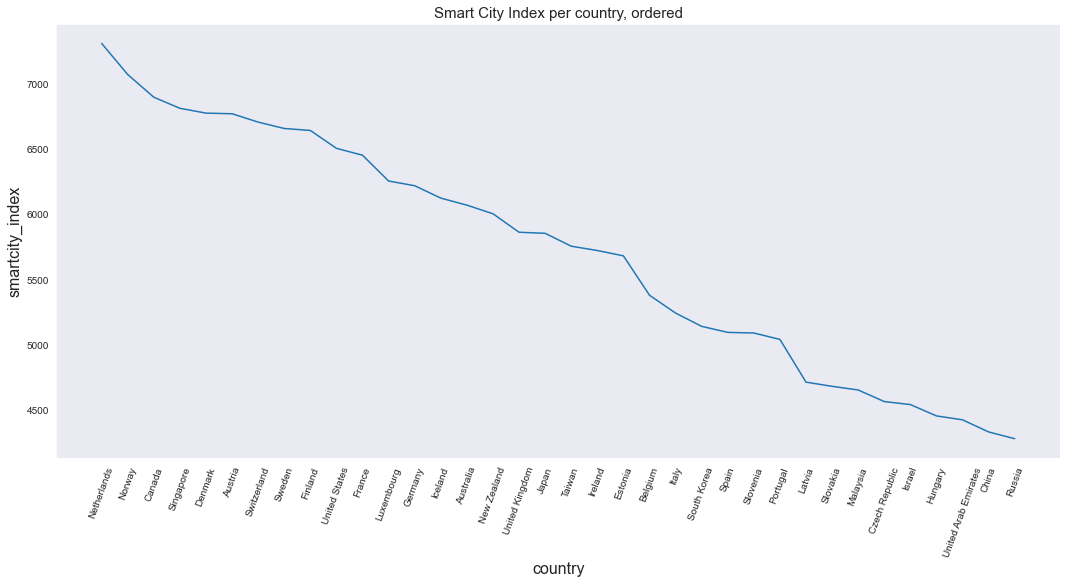

In [40]:
# Visualizing the trend

plt.figure(figsize=(18, 8))
plt.xticks(rotation=70)
plt.grid()
sns.lineplot(x = mean_sci.index, y=mean_sci.smartcity_index)
plt.title('Smart City Index per country, ordered', fontsize = 15)

### Descriptive statistic

In [41]:
# Some dataset statistics
sci.describe().round().astype('int64')

,smart_mobility,smart_environment,smart_government,smart_economy,smart_people,smart_living,smartcity_index
count,102,102,102,102,102,102,102
mean,5759,5944,5894,6132,5874,6377,5992
std,1214,1724,1153,1802,1449,2286,853
min,3175,1850,2806,1490,2825,1980,4191
25%,4810,4530,5143,5008,4725,4385,5366
50%,5652,6495,5911,6432,5748,6485,6262
75%,6764,7310,6582,7492,7061,8710,6672
max,8110,8844,8726,9225,9695,10000,7353


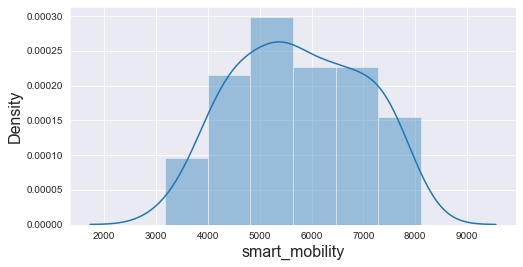

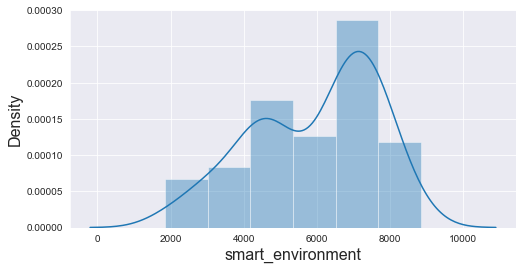

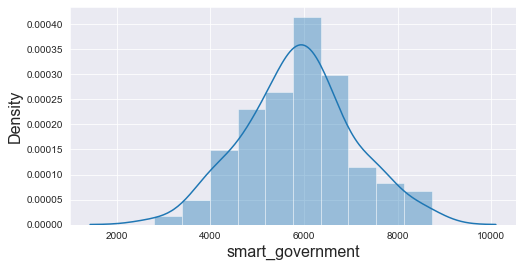

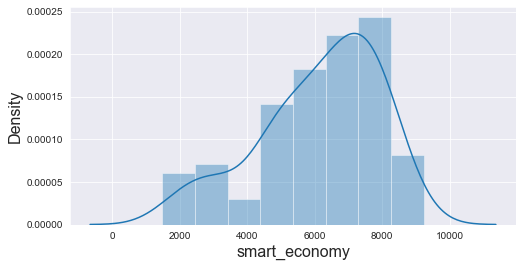

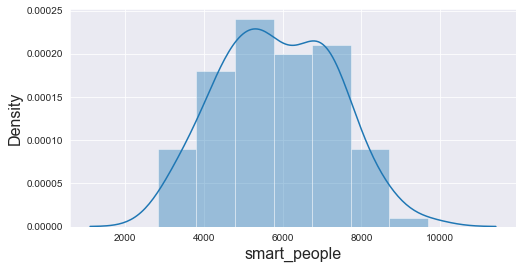

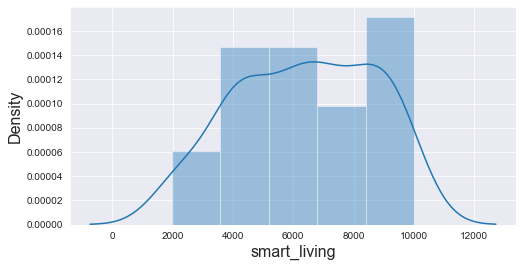

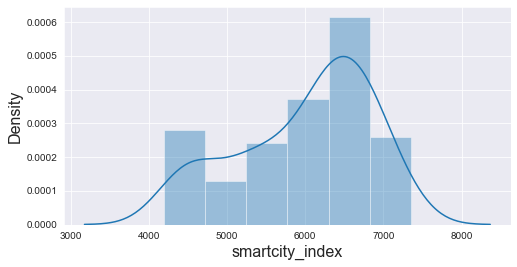

In [42]:
# Distributions of the data
eda.plot_distributions(sci.select_dtypes(np.number), figsize=(8, 4))

Text(0.5, 1.0, 'Boxplot of Smart City Subindexes')

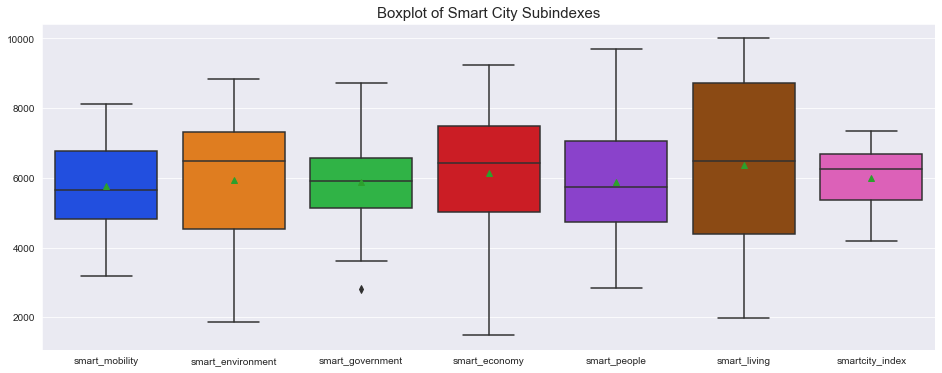

In [43]:
#Closer look at normal distribution patterns in a Boxplot.
plt.figure(figsize=(16,6))
sns.boxplot(data=sci, showmeans=True, palette='bright')
plt.title('Boxplot of Smart City Subindexes', fontsize = 15)

**Comments:**

Here you can see that the Smart Living as well as Smart Environment indexes have the largest data dispersion, whereas the Smart Government the smallest. At the same time, distribution of data varies significantly.

Also the boxplot shows that the meadian and mean values does not match, that means that the distribution of values is not normal for most of the indexes.



## Correlation between Smart Cities Indexes

Let's look at the correlation between all Smart City indexes to identify if there are some of them that potentially contribute more to the total smart city index.

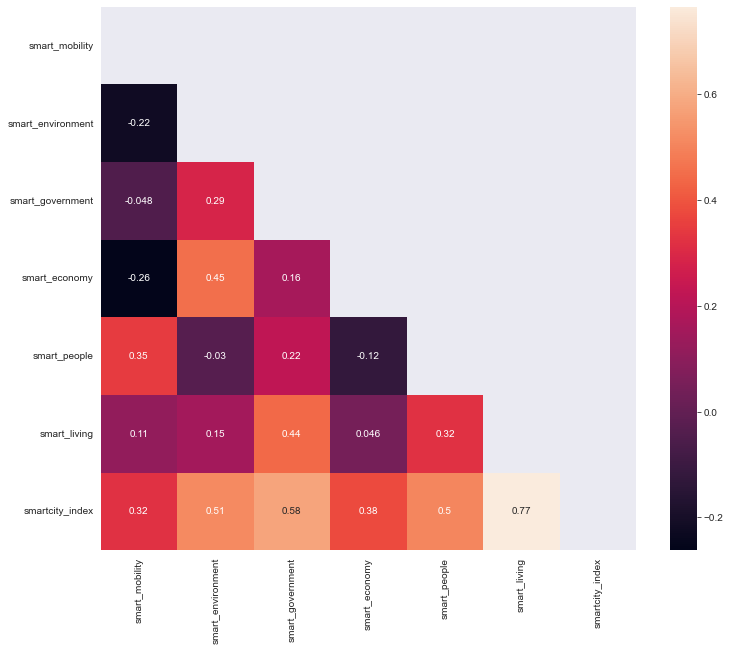

In [44]:
# Correlation heatmap
eda.show_corr_heatmap(sci, figsize=(12, 10))

<Figure size 576x720 with 0 Axes>

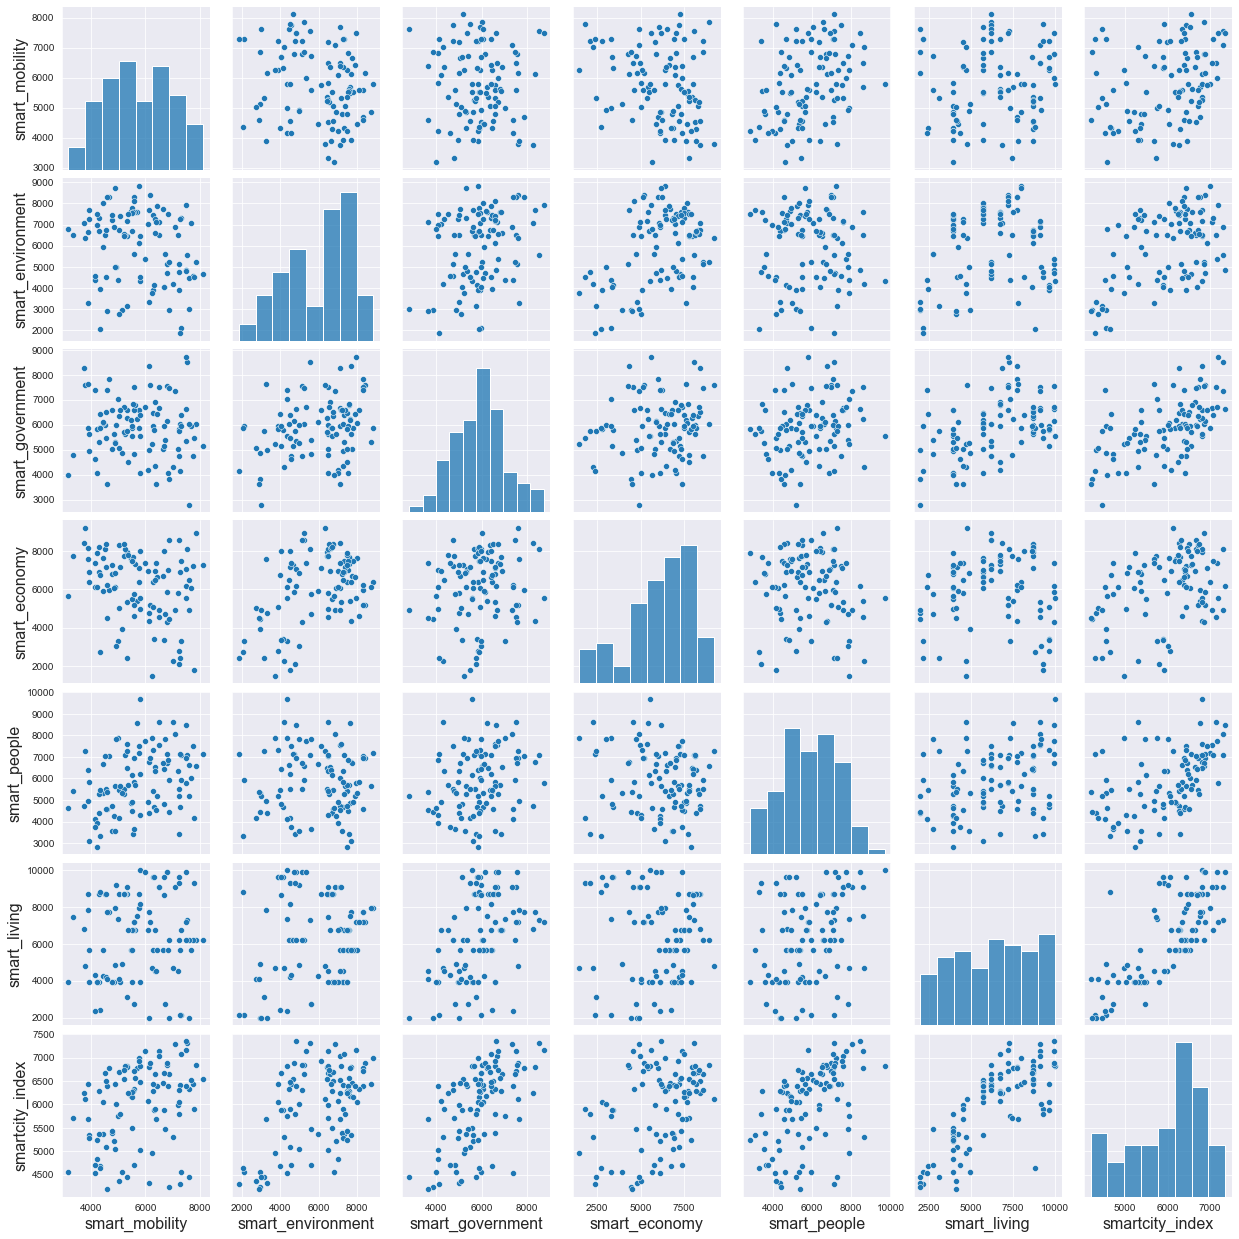

In [45]:
# Pairplot
plt.figure(figsize=(8, 10))
sns.pairplot(sci, kind='scatter')
plt.show()

In [46]:
# Closer look to correlations
eda.report_multicoll(sci).sort_values('corr', ascending=False).round(2)

,feat1,feat2,corr
5,smart_living,smartcity_index,0.77
3,smart_government,smartcity_index,0.58
2,smart_environment,smartcity_index,0.51
9,smart_people,smartcity_index,0.50
1,smart_economy,smart_environment,0.45
4,smart_government,smart_living,0.44
0,smart_economy,smartcity_index,0.38
8,smart_mobility,smart_people,0.35
7,smart_mobility,smartcity_index,0.32
6,smart_living,smart_people,0.32


## Insights from analysis for correlation 

First of all, smart city indexes data in the dataset hardly has normal distribution. 

From this dataframe with correlations of all indexes with each other we can see some interesting trends:

1. Smart City index has high and medium correlations with several subindexes: Smart Living (0.77), 
Smart Government(0.58), Smart Environment and Smart People.
2. Subindexes has low correlation between each other, exceptions are the medium correlation (0.44) between Smart Government and Smar Living subindexes, as well as Smart People and Smart Mobility subindexes (0.35). 
3. High intercorrelation between subindexes has to be further explored to identify trends: whether indicators of those indexes have higher influence on the overall Smart City index value, or the assessment methodology should be reviesed.

### World Energy Consumption dataset

In [47]:
# Load the data
wec_raw = cleaning.load_data(config.DB_WEC_PATH)

# Dump value counts for further exploration
cleaning.dump_value_counts('data_expl/', wec_raw)

#### Understanding the dataset

Try to subdivide the dataset in other sub-dataset.
1. One will be the ones with all the primary energy productions, consumption,
   shares etc.
2. Other will be with overall measures such as overall energy production
<br><br>
After that, an EDA will be performed, it will also be easier to understand the <br> 
dataset's behaviour (missing data per country, missing data per energy src etc.) <br>
These sub-dataset can be indexed by the identifiers that reports general id like <br>
country, population and gdp. 

Which kind of data is available for energy source?

In [48]:
# Categorize columns
pure_energy_src = ['biofuel', 'coal', 'gas', 'hydro', 'nuclear', 'oil', 'solar', 'wind']
aggragated_energy_src = ['fossil', 'low-carbon', 'other-renewables', 
                         'other-renewables-exc-biofuel', 'renewables']
overall_energy_measures = ['energy_cons_change_pct', 'energy_cons_change_pct', 
                           'carbon_intensity_elec', 'electricity_generation', 
                           'fossil_electricity', 'renewables_electricity',
                           'energy_per_gdp', 'energy_per_capita', 
                           'per_capita_electricity', 'primary_energy_consumption']
identifiers = ['iso_code', 'country', 'year', 'population', 'gdp']

### Formatting the dataset

energy-src_measure_opt_measure_opt_unit

For each pure energy src we have the following:

1. Consumption data **cons**
   For **cons** data then we have
   1. Primary fuel consumption if only **cons** in terawatt-hours
   2. **change** --> representing annual change in energy src consumption
      1. **change** can be percentatage with **pct**
      2. **change** can be in terawatt-hours with **twh**
   3. **per_capita** if measured in terwatt-hours per capita
2. Electricity consumption from the energy src with **elec**:
   1. Pure electricity consumption if only **elec** in terawatt-hours
   2. **per_capita** if electricity is measured per capita
3. **share** when accounting for the share among the other energy srcs:
   1. could be **elec** referring to electricity consuption;
   2. could be **energy** when accounting for energy srcs
4. **prod** accounts for prod (elec+thermal?) using the energy source:
   1. if no additional keywords, is the overall production in terawatt hours;
   2. with **per_capita** accounts with the production per capita in twh;
   3. with **change** keyword accounts for the annual change in production:
      1. could be percentage if **pct**
      2. could be in twh if **twh**

In [49]:
# Format data as explined
# production --> prod
# consumption --> cons
# electricity --> elec
wec = wec_raw.copy()

wec.columns = wec_raw.columns.str.replace('production', 'prod').str.replace('electricity', 'elec').str.replace('consumption', 'cons')
wec.columns = wec.columns.str.replace('renewable', 'renewables')
wec.columns = wec.columns.str.replace('renewabless', 'renewables')
wec.columns = wec.columns.str.replace('low_carbon', 'low-carbon')
wec.columns = wec.columns.str.replace('other_renewables', 'other-renewables')
wec.columns = wec.columns.str.replace('other-renewables_exc_biofuel_electricity', 'other-renewables-exc-biofuel_elec')
wec.columns = wec.columns.str.replace('other-renewables_elec_per_capita_exc_biofuel', 'other-renewables-exc-biofuel_elec_per_capita')
wec.columns = wec.columns.str.replace('other-renewables_share_elec_exc_biofuel', 'other-renewables-exc-biofuel_share_elec')
wec.columns = wec.columns.str.replace('other-renewables_exc_biofuel', 'other-renewables-exc-biofuel')

# if after a energy src "energy" is present, it is an alias for primary energy consumption "cons" and could be substitued
old_cols = list(wec.columns)
new_cols = old_cols
for i in range(len(wec_raw.columns)):
    # Check that col refer to an energy src and 'energy' keyword is in 2nd position
    splitted_col = old_cols[i].split('_')
    if splitted_col[0] in (pure_energy_src+aggragated_energy_src) and splitted_col[1] == 'energy':
        splitted_col[1] = 'cons'
        new_cols[i] = '_'.join(splitted_col)

wec.columns = new_cols

# Change dtype of year
wec['year'] = pd.to_datetime(wec['year'], format='%Y')
wec['year'] = wec['year'].dt.year

# Adding one more column with additional calculation
wec['gdp_per_capita']=wec['gdp']/wec['population']

### Data cleaning

In [50]:
# Slice the data for the last *70* years
start_year = 1990
wec = wec.loc[wec.year >= start_year].reset_index(drop=True)

In [51]:
#For Items like GDP  it doesnt make sense to replace the null values with a 0 ,so let's try FWD fill and then backwards fill
#looks like we have a lot of empty Values
nulls=wec.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)
wec.isna().sum().sum() # Check total null values is 0

0

In [52]:
# Formatted floats to avoid scientific notations 

pd.options.display.float_format = '{:,.2f}'.format

### EDA

In [53]:
wec.describe()

,year,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_cons,biofuel_elec_per_capita,biofuel_elec,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_cons,coal_elec_per_capita,coal_elec,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_prod,coal_share_elec,coal_share_energy,elec_demand,elec_generation,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_elec,fossil_cons_per_capita,fossil_fuel_cons,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_cons,gas_elec_per_capita,gas_elec,gas_cons_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_prod,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_cons,hydro_elec_per_capita,hydro_elec,hydro_cons_per_capita,hydro_share_elec,hydro_share_energy,low-carbon_cons_change_pct,low-carbon_cons_change_twh,low-carbon_cons,low-carbon_elec_per_capita,low-carbon_elec,low-carbon_cons_per_capita,low-carbon_share_elec,low-carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_cons,nuclear_elec_per_capita,nuclear_elec,nuclear_cons_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_cons,oil_elec_per_capita,oil_elec,oil_cons_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_prod,oil_share_elec,oil_share_energy,other-renewables_cons,other-renewables_elec,other-renewables-exc-biofuel_elec,other-renewables_cons_change_pct,other-renewables_cons_change_twh,other-renewables_elec_per_capita,other-renewables-exc-biofuel_elec_per_capita,other-renewables_cons_per_capita,other-renewables_share_elec,other-renewables-exc-biofuel_share_elec,other-renewables_share_energy,per_capita_elec,primary_energy_cons,renewables_cons_change_pct,renewables_cons_change_twh,renewables_cons,renewables_elec_per_capita,renewables_elec,renewables_cons_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_cons,solar_elec_per_capita,solar_elec,solar_cons_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_cons,wind_elec_per_capita,wind_elec,wind_cons_per_capita,wind_share_elec,wind_share_energy,gdp_per_capita
count,"9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00","9,474.00"
mean,"2,005.25","156,850,408.05","842,804,581,551.32",10.78,5.47,399.79,91.11

### 2.1 World Energy Consumption patterns

In [54]:
# Define maybe top emissions ghg countries here
countries = ['Saudi Arabia','United Kingdom','France','Germany', 'Italy', 'Spain', 'United States','Japan','India', 'Canada', 'China']

Text(0.5, 0.35, 'GDP per capita')

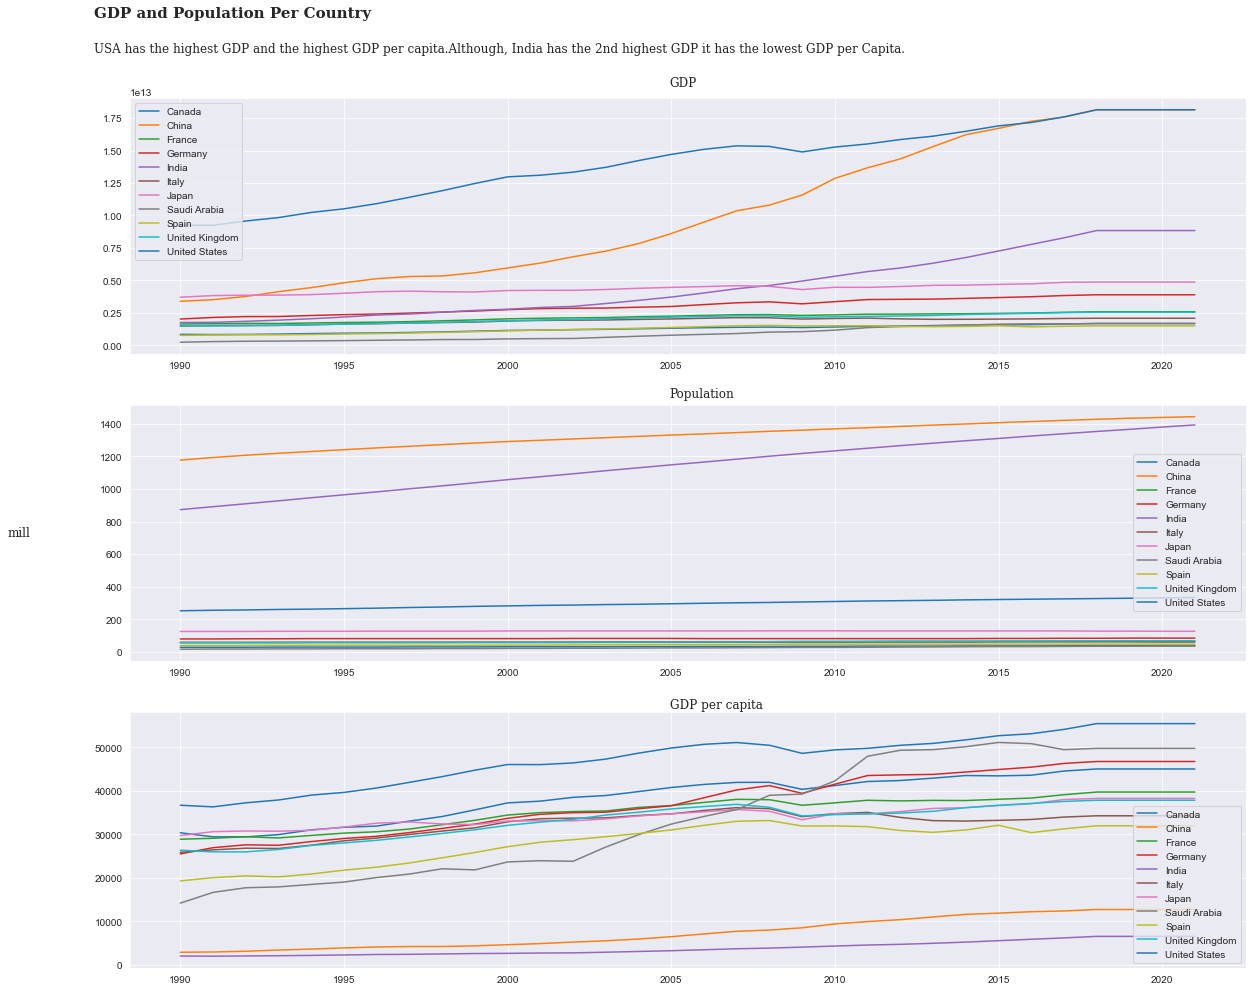

In [55]:
# lets plot the gdp , population and gdp per capita  per country
wec_gdp = wec.loc[wec.country.isin(countries)].groupby(['year','country'])['gdp'].sum().unstack('country')
wec_pop = wec.loc[wec.country.isin(countries)].groupby(['year','country'])['population'].sum().unstack('country')
wec_pop_mil = round(wec_pop/1000000)

wec_gdp_per_capita=  wec.loc[wec.country.isin(countries)].groupby(['year','country'])['gdp_per_capita'].sum().unstack('country')
fig, ax = plt.subplots(3, 1, figsize=(20, 16))
ax[0].plot(wec_gdp,label=wec_gdp.columns)
ax[0].legend()
ax[1].plot(wec_pop_mil,label=wec_pop_mil.columns)
ax[1].legend()
ax[2].plot(wec_gdp_per_capita,label=wec_gdp_per_capita.columns)
ax[2].legend()
fig.text(0.1, 0.95, 'GDP and Population Per Country', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 
'''USA has the highest GDP and the highest GDP per capita.Although, India has the 2nd highest GDP it has the lowest GDP per Capita.'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, 
'''mill'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, 
'''GDP'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,
'''Population'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,
'''GDP per capita'''
, fontsize=12, fontweight='light', fontfamily='serif')

In [56]:
# Let's separate other regions to more major categores incl. "Other regions"

middleeast=['Middle East', 'Other Middle East']
asia=['Asia Pacific','Other Asia & Pacific']
cis=['Other CIS', 'CIS']
otherregions=['Other South America', 'Other Northern Africa', 'Other Southern Africa','Other Caribbean']
wec['country']=wec['country'].replace(asia, 'Asia Pacific')
wec['country']=wec['country'].replace(otherregions, 'Other regions')
wec['country']=wec['country'].replace(middleeast, 'Middle East')
wec['country']=wec['country'].replace(cis, 'CIS')

In [57]:
# Let's have a look at the Primary energy sources consumption profiles for year 2000 and the latest available - 2020.
wec1 = wec.copy()
features = ['country', 'year'] + [energy_src + '_share_energy' for energy_src in pure_energy_src]
wec1 = wec1[features]
wec1

,country,year,biofuel_share_energy,coal_share_energy,gas_share_energy,hydro_share_energy,nuclear_share_energy,oil_share_energy,solar_share_energy,wind_share_energy
0,Afghanistan,1990,0.00,33.57,15.25,6.48,0.92,43.70,0.00,0.00
1,Afghanistan,1991,0.00,33.57,15.25,6.48,0.92,43.70,0.00,0.00
2,Afghanistan,1992,0.00,33.57,15.25,6.48,0.92,43.70,0.00,0.00
3,Afghanistan,1993,0.00,33.57,15.25,6.48,0.92,43.70,0.00,0.00
4,Afghanistan,1994,0.00,33.57,15.25,6.48,0.92,43.70,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
9469,Zimbabwe,2017,0.69,26.90,24.42,6.76,4.25,30.95,1.63,2.95
9470,Zimbabwe,2018,0.69,26.90,24.42,6.76,4.25,30.95,1.63,2.95
9471,Zimbabwe,2019,0.69,26.90,24.42,6.76,4.25,30.95,1.63,2.95
9472,Zimbabwe,2020,0.69,26.90,24.42,6.76,4.25,30.95,1.63,2.95


In [58]:
# Using median and not mean to avoid outliers
wec1 = wec1.groupby(by='year', axis=0, as_index=False).median()
wec1.columns = [col.split('_')[0].title() for col in wec1.columns]
pure_energy_src = [src.title() for src in pure_energy_src]

In [59]:
# Unpivot the table
wec1 = pd.melt(wec1, id_vars='Year',
               value_vars=pure_energy_src,
               var_name='Energy Sources',
               value_name='Share of primary energy consumption')

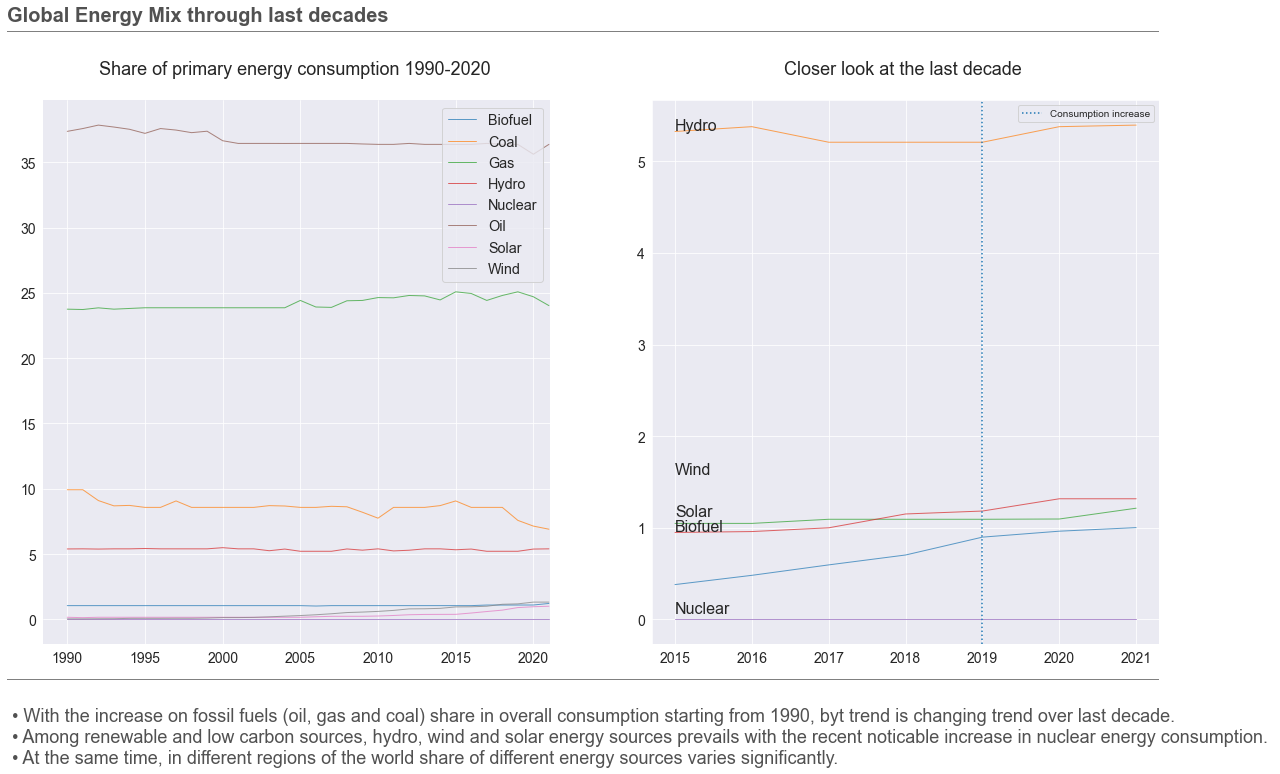

In [63]:
# Creating the first plot with 1990-2020 data
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.set_style(style='darkgrid')

for i in pure_energy_src:
    axes[0].plot(wec1[wec1['Energy Sources'] == i]['Year'],
                 wec1[wec1['Energy Sources'] == i]['Share of primary energy consumption'],
                 alpha=0.7,
                 linewidth=1,
                 fillstyle='full')

# Second plot with data on the last decade with the closer look at the renewable and lower carbon sources exclusively in latest timespan
lc_srcs = ['Solar',  'Hydro',  'Biofuel', 'Wind', 'Nuclear'] # Low-carbon srcs
wec2 = wec1[(wec1['Year'] >= 2015)&(wec1['Year']<=2021)]  
wec2 = wec2[wec2['Energy Sources'].isin(lc_srcs)]

for j in lc_srcs:
    axes[1].plot(wec2[wec2['Energy Sources'] == j]['Year'], 
            wec2[wec2['Energy Sources'] == j]['Share of primary energy consumption'], 
            alpha=0.7, 
            linewidth=1)

year_start, year_end = 2015, 2021

names = wec2[['Energy Sources', 'Share of primary energy consumption']][wec2['Year'] == year_end -1]

ad = 0
for i, value in names.itertuples(index=False):
    axes[1].text(x=year_start, y=value + ad, s=i, va="top", size=16)
    ad+=0.1

#General settings

axes[0].set_title('Share of primary energy consumption 1990-2020 \n', size=18)
axes[1].set_title('Closer look at the last decade \n', size=18)
axes[0].spines[['top','right','left']].set_visible(False)

axes[1].set_xticks(np.arange(year_start, year_end +1))
axes[0].set_xlim([None, year_end + 0.1])

axes[0].legend(pure_energy_src, loc='upper right', fontsize='x-large')
axes[1].legend(lc_srcs, loc='upper right', fontsize='x-large')

axes[0].text(x=0.1, y=0.99, s="Global Energy Mix through last decades", transform=fig.transFigure, ha='left', fontsize=20, weight='bold', alpha=.8)
axes[0].add_patch(plt.Rectangle((0.1,0.075),              
                           0.8,                     
                           0.002,                      
                           facecolor='grey', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

axes[0].add_patch(plt.Rectangle((0.1,0.975),              
                           0.8,                     
                           0.002,                      
                           facecolor='grey', 
                           transform=fig.transFigure, 
                           clip_on=False, 
                           linewidth = 0))

axes[0].text(x=0.1, y=-0.04, s=" • With the increase on fossil fuels (oil, gas and coal) share in overall consumption starting from 1990, byt trend is changing trend over last decade.\n • Among renewable and low carbon sources, hydro, wind and solar energy sources prevails with the recent noticable increase in nuclear energy consumption. \n • At the same time, in different regions of the world share of different energy sources varies significantly.", 
             transform=fig.transFigure, 
             ha='left', 
             fontsize=18, alpha=.8)

axes[0].xaxis.set_tick_params(labelsize=14) 
axes[1].xaxis.set_tick_params(labelsize=14) 
axes[0].yaxis.set_tick_params(labelsize=14) 
axes[1].yaxis.set_tick_params(labelsize=14) 

plt.axvline(x=2019, linestyle='dotted', label='Consumption increase')
plt.legend(loc = 'upper right')
plt.show()


Let's Try some animations !

In [76]:
import plotly.express as px

# Focusing on columns with data on annual percentage change in energy sources consumption starting year 1990
cons = wec.copy()
cons_features = [col for col in cons.columns if '_cons_change_pct' in col] + ['gdp', 'energy_per_gdp', 'energy_per_capita', 'year', 'country']

cons = cons[cons_features]

# Central America removed due to it is the part of 'South and Central America' value.

regions = ['World', 'Europe', 'Europe (other)','North America', 'Central America', 'South & Central America', 'CIS',  'South Africa', 'Eastern Africa', 'Other regions', 'Asia Pacific', 'Middle East']

cons = cons[cons['country'].isin(regions)]

fig = px.bar(cons,
             x='country', y='energy_cons_change_pct',
             color='country',
             animation_frame='year',
             animation_group='country',
             range_y=[-15, 15],
             labels={'energy_cons_change_pct': 'Energy consumption change, %'}, 
             title='Regional Changes in Energy Consumption from 1990, %')

fig.add_vrect(x0=11.5, x1=10.5)
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

,biofuel_cons_change_pct,coal_cons_change_pct,energy_cons_change_pct,fossil_cons_change_pct,gas_cons_change_pct,hydro_cons_change_pct,low-carbon_cons_change_pct,nuclear_cons_change_pct,oil_cons_change_pct,other-renewables_cons_change_pct,renewables_cons_change_pct,solar_cons_change_pct,wind_cons_change_pct,gdp,energy_per_gdp,energy_per_capita,year,country
2491,26.48,-5.65,0.13,0.09,4.91,1.66,0.35,-1.02,0.95,40.54,2.51,37.50,51.23,"195,740,319,744.00",0.46,"48,696.15",1990,Europe
2492,26.48,-6.68,-1.30,-1.87,1.83,1.91,2.27,2.47,-1.25,3.15,1.97,24.00,25.73,"195,740,319,744.00",0.46,"47,934.57",1991,Europe
2493,26.48,-6.09,-3.68,-4.54,-4.18,2.61,1.45,0.58,-3.81,5.76,2.78,61.86,56.63,"195,740,319,744.00",0.46,"46,066.87",1992,Europe
2494,26.48,-7.31,-3.49,-4.66,-0.05,2.24,3.10,3.45,-6.40,10.52,2.59,29.08,48.84,"195,740,319,744.00",0.46,"44,379.38",1993,Europe
2495,26.48,-7.55,-4.05,-4.67,-4.56,1.70,-0.91,-2.77,-2.95,5.02,1.90,7.12,30.39,"195,740,319,744.00",0.46,"42,529.08",1994,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2.70,0.57,1.94,1.51,2.72,1.43,4.66,0.89,1.46,6.51,6.11,35.98,18.53,"110,430,655,610,880.00",1.43,"20,853.57",2017,World
9373,7.54,1.29,2.77,2.35,5.00,2.78,5.64,2.40,1.40,7.82,6.83,29.36,11.36,"113,630,171,365,376.00",1.42,"21,199.17",2018,World
9374,7.10,-1.39,0.87,0.15,1.84,1.15,5.07,3.55,0.22,4.93,5.60,22.16,11.86,"113,630,171,365,376.00",1.42,"21,154.45",2019,World
9375,-4.87,-3.97,-3.99,-5.38,-1.55,2.71,2.79,-3.66,-9.35,4.32,5.00,20.21,12.38,"113,630,171,365,376.00",1.42,"20,099.32",2020,World
